In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [5]:
!mkdir wildCats

In [23]:
wild_cats = 'tiger', 'lion', 'jaguar'
path = Path('wildCats')
for cat in wild_cats:
    dest = (path/cat)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{cat} animal')
    download_images(dest, urls=results)

In [24]:
fns = get_image_files(path)
fns

(#525) [Path('wildCats/jaguar/00904220-1fc2-46be-9e49-1a3f44737792.jpg'),Path('wildCats/jaguar/0167f6a7-e949-4124-9d1f-eeb711d9deb3.jpg'),Path('wildCats/jaguar/01cbe1e1-2d0b-478b-b8a8-13193b92e9cb.jpg'),Path('wildCats/jaguar/05512a37-21fd-440d-981e-c1674c5c0a38.jpg'),Path('wildCats/jaguar/0735fcf8-384b-4b43-a043-d343a74d739b.JPG'),Path('wildCats/jaguar/097b50e1-1416-4687-b185-841f6e51c237.jpg'),Path('wildCats/jaguar/0aaf1ed4-11c4-48b6-9710-202b3127a9b9.jpg'),Path('wildCats/jaguar/0b904c45-4b18-4f77-b57e-639d6d7a7b62.jpg'),Path('wildCats/jaguar/0cc58a9a-4a3f-4c2d-9192-36ba2448cac9.jpg'),Path('wildCats/jaguar/0cf6ad9e-60f0-4ad2-8b66-41d815442b3b.jpg')...]

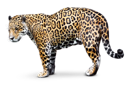

In [27]:
im = Image.open(f'{path}/jaguar/00904220-1fc2-46be-9e49-1a3f44737792.jpg')
im.to_thumb(128,128)

In [28]:
failed = verify_images(fns)
failed

(#21) [Path('wildCats/jaguar/42da742b-86f5-4ac3-8d3e-695cddc68df4.jpg'),Path('wildCats/jaguar/45ddaf85-c6c3-417d-aecc-ca1279fd7097.jpg'),Path('wildCats/jaguar/7311c7f8-c3fe-4895-beb8-de65dabe2b7a.jpg'),Path('wildCats/jaguar/89ab8f36-8c4b-48af-9104-6551ee021d12.jpg'),Path('wildCats/jaguar/ad0941c4-7c51-430d-94d4-688c7f5a41bc.jpg'),Path('wildCats/jaguar/f5970c21-6432-43b1-bbd6-0f28bcdb848f.jpg'),Path('wildCats/lion/0d3da8d8-4d5b-4314-b880-2db6a5ccf070.jpg'),Path('wildCats/lion/27ca470a-b459-4622-8e66-837a7cf6f9a6.jpg'),Path('wildCats/lion/3d6d2040-0d1d-4059-8495-9f9652ee7abe.JPG'),Path('wildCats/lion/71b4eb42-f0fd-4c2a-9cc1-29816012e9bd.jpg')...]

In [29]:
failed.map(lambda p: p.unlink(missing_ok=True));

In [30]:
wild_cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [31]:
dls = wild_cats.dataloaders(path)

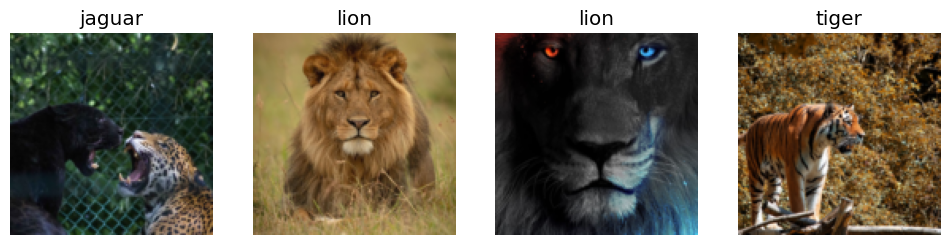

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

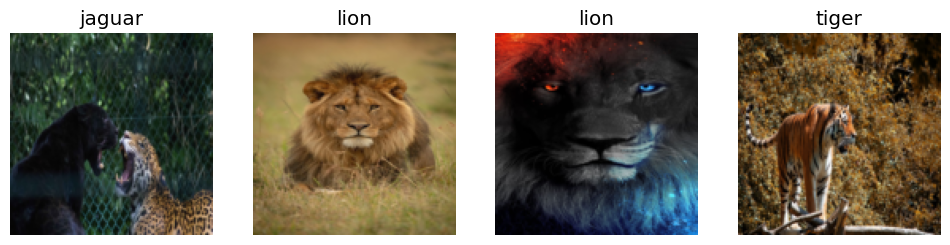

In [33]:
wild_cats = wild_cats.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = wild_cats.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

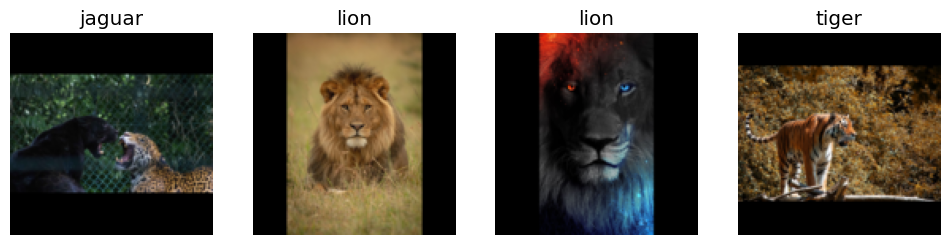

In [34]:
wild_cats = wild_cats.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = wild_cats.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

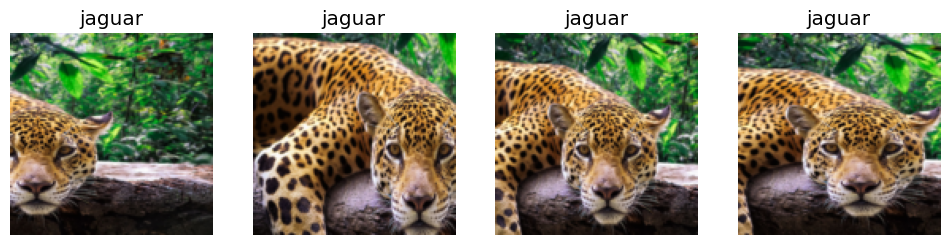

In [35]:
wild_cats = wild_cats.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = wild_cats.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

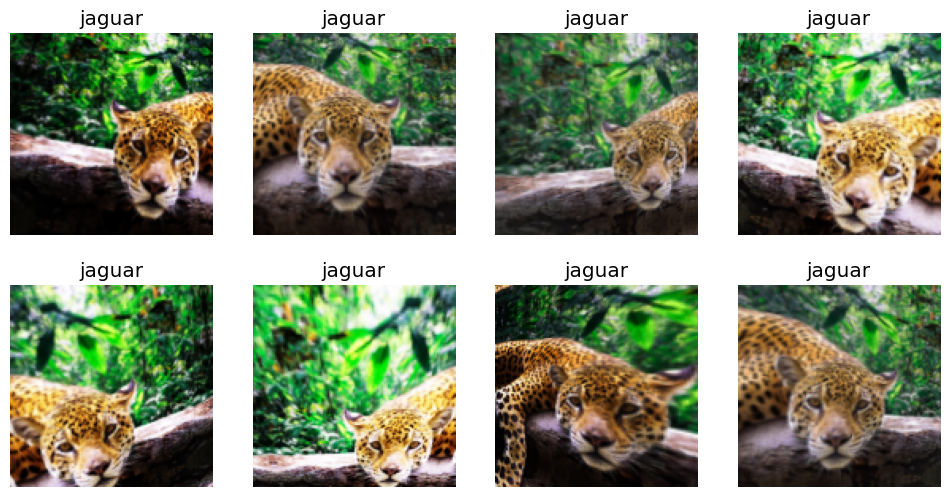

In [36]:
wild_cats = wild_cats.new(item_tfms=Resize(128), batch_tfms=(aug_transforms(mult=2)))
dls = wild_cats.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [37]:
wild_cats = wild_cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = wild_cats.dataloaders(path)

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.123835,0.097018,0.040000,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.211337,0.058388,0.030000,02:44
1,0.138546,0.020935,0.000000,02:37
2,0.095141,0.033309,0.020000,02:28
3,0.084347,0.039367,0.020000,02:32


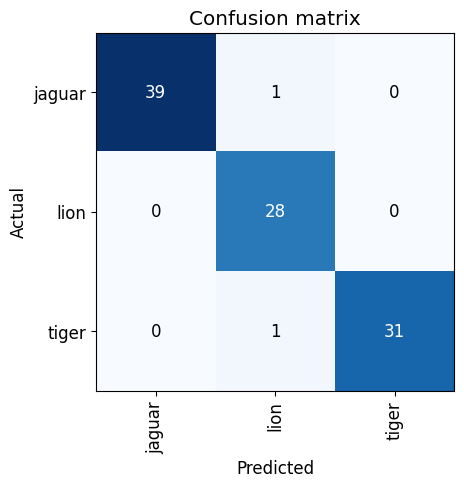

In [40]:
interpMatrix = ClassificationInterpretation.from_learner(learn)
interpMatrix.plot_confusion_matrix()

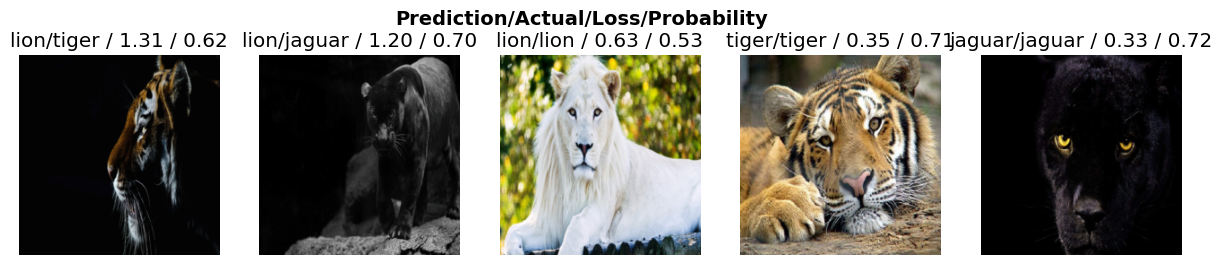

In [42]:
interpMatrix.plot_top_losses(5, nrows=1)

In [43]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [44]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [45]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.023255,0.030293,0.020000,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.028578,0.027211,0.020000,02:30
